#### 공부시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀 
- 알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형분포여야함

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 임의의 데이터
hour=[1,3,4,5,7,9,10]
jumsu=[32,55,83,70,99,92,100]
lesson=[0,0,2,1,2,0,1]

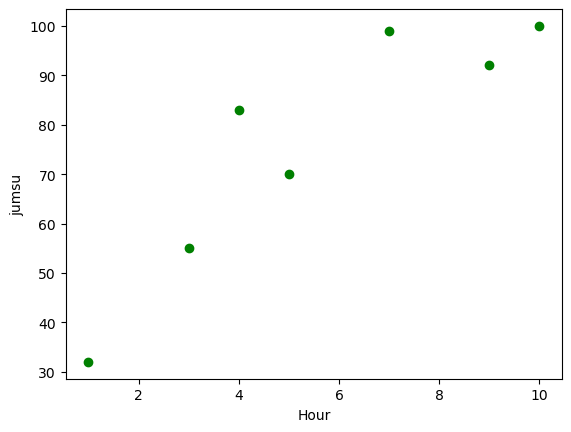

In [3]:
### 현재 데이터의 분포 확인
plt.plot(hour, jumsu, 'go')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.show()

In [4]:
### 학습용 데이터셋 구성 => 피쳐와 타겟
dataDF=pd.DataFrame({'Hour':hour,'Lesson':lesson})
jumsuSR=pd.Series(jumsu)

[2] 학습 진행 - 다중 선형 회귀

In [5]:
#모듈로딩
from sklearn.linear_model import LinearRegression

In [6]:
# 모듈 인스턴스 생성
model=LinearRegression()

In [7]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(dataDF,jumsuSR)

LinearRegression()

In [8]:
# 학습 후 모델 파라미터 => 피쳐가 2개 => coef_2개
print(f'model.coef_:{len(model.coef_)} 개, {model.coef_}')
print(f'model.intercept_:{model.intercept_}')

model.coef_:2 개, [ 6.27924892 11.61819933]
model.intercept_:30.914299470390006


[3] 모델 성능 평가

In [9]:
# 모듈 로딩 => 손실/비용함수로 오차 계산, 결정계수
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [10]:
# 점수 => 내부에서 predict()진행 ===> 결과로 R2 계수 추출해서 반환
score=model.score(dataDF,jumsuSR)
print(f'score : {score}')

score : 0.9649627963178466


In [14]:
# 성능지표 => 오차계산과 결정계수 계산
pre_jumsu=model.predict(dataDF)

# 손실/비용 계산 함수 ==> 정답과 예측값
mse=mean_squared_error(jumsuSR,pre_jumsu)
rmse=mean_squared_error(jumsu,pre_jumsu,squared=False)
mae=mean_absolute_error(jumsuSR, pre_jumsu)

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표, ==> 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2=r2_score(jumsuSR, pre_jumsu)

In [13]:
## 손실/비용함수 값은 0에 가까울수록
## 결정계수 값은 1에 가까울 수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2: {r2}')

mse : 19.134603480294373
rmse : 4.374311772187069
mae : 4.127794208680101
r2: 0.9649627963178466
